In [33]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from statistics import mean
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel
# insert the path to your Data here5
datapath = "./Daten/"
# Konstanten
c0                  = 299792458             # Vakuum Lichtgeschwindigkeit
h                   = 6.626e-34             # Plank'sches Wirkungsquantum
hbar                = 6.626e-34/(2*np.pi)   # Reduzierte Plank-Konstante
e                  = 1.6022e-19
m_e =9.109383713e-31 
eps_0=8.8541878e-12
h_exp=6.30968824e-34
def Rydberg(x):
    return (m_e*e**4)/(8*c0*eps_0**2*(x)**3)
def niveaus(x,m):
    return Rydberg(m)*(1/4-1/(x**2))

In [58]:
data=np.loadtxt('gitter.txt')
wl=data[:,0]
wg=data[:,1]
wb=data[:,2]
wlr=0
wgr=1*np.pi/180
wbr=1*np.pi/180
b=(wg-wb+180)*np.pi/180
bgrad=(wg-wb+180)
a=wg*np.pi/180
ar=wgr*np.pi/180
br=np.sqrt(wgr**2+wbr**2)
x1=np.sin(a)+np.sin(b)
x1r=np.sqrt((ar*np.cos(a))**2+(br*np.cos(b))**2)
G=wl/x1
Gr=np.sqrt((wlr/x1)**2+(x1r*G/x1)**2)
print(mean(G))
Gmr=1/11*np.sqrt(Gr[0]**2+Gr[1]**2+Gr[2]**2+Gr[3]**2+Gr[4]**2+Gr[5]**2+Gr[6]**2+Gr[7]**2+Gr[8]**2+Gr[9]**2+Gr[10]**2)
print(Gmr)
with open('gittertab.txt','w') as t:
    for h in range(0,11):
        t.write(str(wl[h])+'\t'+str(wg[h])+'\t'+str(wb[h])+'\t'+str(np.round(x1[h],2))+'$\pm$'+str(np.round(x1r[h],2))+'\t'+str(np.round(G[h],2))+'$\pm$'+str(np.round(Gr[h],2))+'\n')

def funktion(x,m):
    return m*x
anpassungs_werte, co_var = curve_fit(funktion, x1, wl)
perr= np.sqrt(np.diag(co_var))
print("h,W_a:", anpassungs_werte, "+/-", perr, "nm")
Rfit    = funktion(x1, *anpassungs_werte)
g=anpassungs_werte[0]
gr=perr[0]

417.55914670031683
1.6871188889868993
h,W_a: [417.13376796] +/- [1.15981068] nm


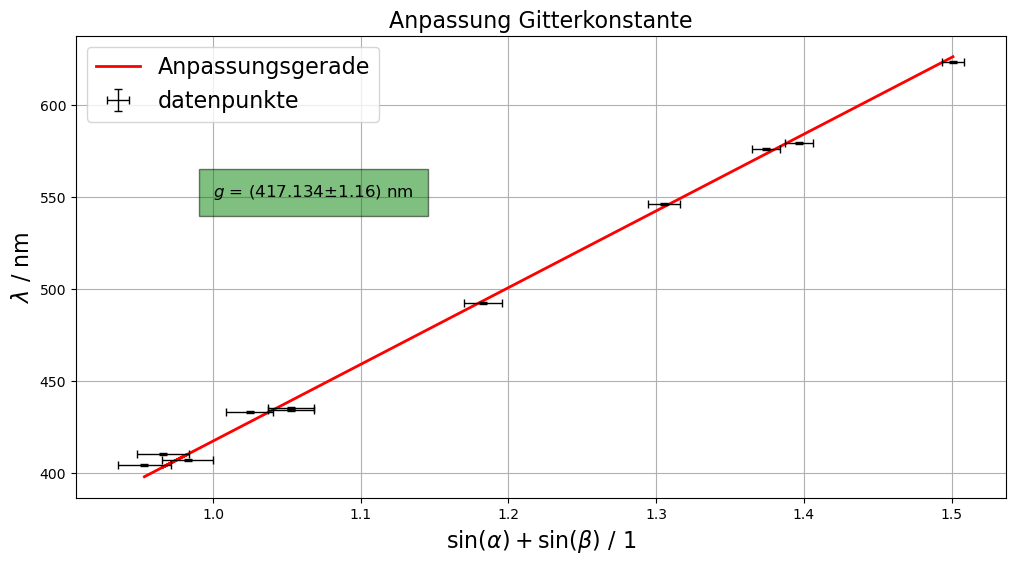

In [11]:
plt.figure(figsize=(12,6))
plt.title('Anpassung Gitterkonstante',fontsize=16)
G3label  = r"$g$ = $($" + str(np.round(anpassungs_werte[0], 3)) + r"$\pm$" + str(np.round(perr[0], 3)) + r"$)$ nm"
plt.text( 1.0,550, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
#G4label  = r"$W_A$ = $($" + str(np.round(anpassungs_werte[1], 3)) + r"+/-" + str(np.round(perr[1], 3)) + r"$)$ eV"
#plt.text( 7.0*1e14,0.6, G4label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
# plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data')
# plt.plot(U2[h],I2[h],'r x',markersize=5)
# plt.plot(U2[h],Rfit,'r',label='Anpassungsgerade')
# plt.errorbar(U_0_save[h],0.0,0.0,U_0_save_err[h],'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$')
plt.plot(x1,Rfit,'r', linewidth=2,label='Anpassungsgerade')
#plt.plot(x1,wl,'k +')
plt.errorbar(x1,wl,0.5,x1r,'k x',capsize=3,elinewidth=1,markersize=0,label='datenpunkte')
plt.ylabel(r'$\lambda$ / nm',fontsize=16)
plt.xlabel(r'$\sin(\alpha)+\sin(\beta)$ / 1',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
#string(n)=('%d' %n)
plt.savefig('GitterFig.png')

In [59]:
data_b=np.loadtxt('balmer.txt')
wg1=data_b[:,0]
wb1=data_b[:,1]
d=data_b[:,2]
b1=(wg1+wb1-180)*np.pi/180
a1=wg1*np.pi/180
a1r=wgr*np.pi/180
b1r=np.sqrt(wgr**2+wbr**2)
x2=np.sin(a1)+np.sin(b1)
x2r=np.sqrt((a1r*np.cos(a1))**2+(b1r*np.cos(b1))**2)
wl1=g*x2
wl1r=np.sqrt((gr*x2)**2+(g*x2r)**2)
print(Rydberg(h)*1e-6)
print(b1r)
#n_exp= np.sqrt((0.25-1/(Rydberg(h_exp)*wl1*1e-9)))
n=np.linspace(3,7,5)
F=1/(wl1*1e-9)
Fr=wl1r*1e-9/(wl1*1e-9)**2
print(niveaus(n,h))
print(F)
s=6.6*1e-34
anpassungs_werte, co_var = curve_fit(niveaus, n, F,p0=s)
perr= np.sqrt(np.diag(co_var))
print("h,W_a:", anpassungs_werte, "+/-", perr, "nm")
Rfit    = niveaus(n, *anpassungs_werte)
print(Rydberg(anpassungs_werte[0])*1e-6)
print(perr[0]*3*Rydberg(anpassungs_werte[0])/anpassungs_werte[0]*1e-6)
#print(wl1)

3.1926238771163302e-102
0.0246826829897687
[4.43419983e-97 5.98616977e-97 6.70451014e-97 7.09471973e-97
 7.33000380e-97]
[1504140.3298416  2026921.99587928 2281115.04126231 2223911.69203048
 2342071.09859298]
h,W_a: [6.7316632e-34] +/- [3.98513862e-36] nm
10.46599733930657
0.18587583337041277


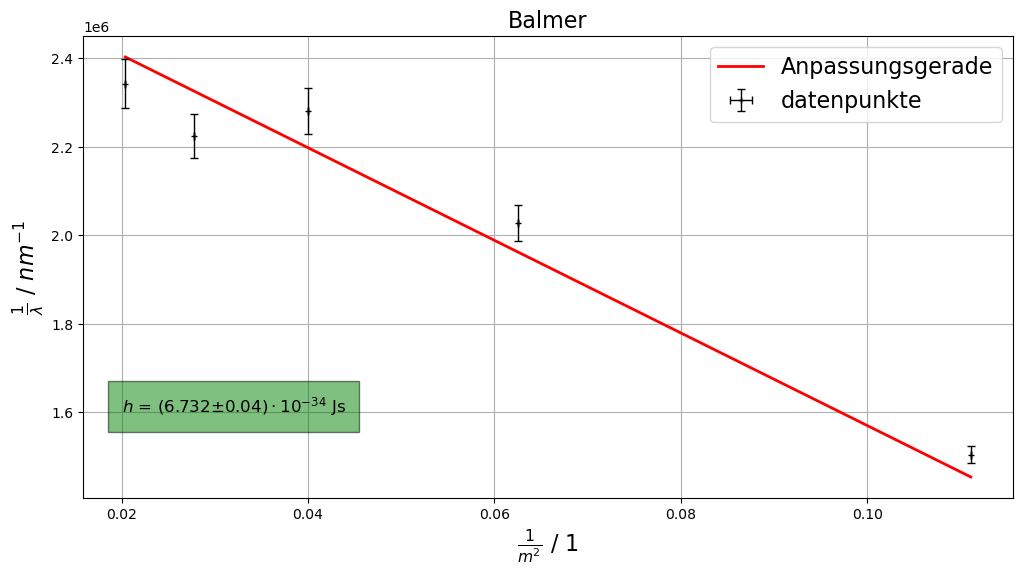

In [26]:
plt.figure(figsize=(12,6))
plt.title('Balmer',fontsize=16)
G3label  = r"$h$ = $($" + str(np.round(anpassungs_werte[0]*1e34, 3)) + r"$\pm$" + str(np.round(perr[0]*1e34, 3)) + r"$)\cdot 10^{-34}$ Js"
plt.text( 0.02, 1.6e6, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
#G4label  = r"$W_A$ = $($" + str(np.round(anpassungs_werte[1], 3)) + r"+/-" + str(np.round(perr[1], 3)) + r"$)$ eV"
#plt.text( 7.0*1e14,0.6, G4label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
# plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data')
# plt.plot(U2[h],I2[h],'r x',markersize=5)
# plt.plot(U2[h],Rfit,'r',label='Anpassungsgerade')
# plt.errorbar(U_0_save[h],0.0,0.0,U_0_save_err[h],'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$')
plt.plot(1/(n**2),Rfit,'r', linewidth=2,label='Anpassungsgerade')
#plt.plot(1/(n**2),F,'k +')
plt.errorbar(1/(n**2),F,Fr,0,'k +',capsize=3,elinewidth=1,markersize=5,label='datenpunkte')
plt.ylabel(r'$\frac{1}{\lambda}$ / $nm^{-1}$',fontsize=16)
plt.xlabel(r'$\frac{1}{m^2}$ / 1',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.savefig('BalmerFig.png')

In [60]:
F=F*1e-6
Fr=Fr*1e-6
name=['H$_{\alpha}$','H$_{\beta}$','H$_{\gamma}$','H$_{\delta}$','H$_{\epsilon}$']
with open('balmertab.txt','w') as f:
    for h in range(0,5):
        f.write(name[h]+'\t'+str(round(wl1[h],2))+'$\pm$'+str(round(wl1r[h],2))+'\t'+str(round(F[h],3))+'$\pm$'+str(round(Fr[h],3))+'\t'+str(round(n[h],3))+'\t'+str(round(wg1[h],3))+'\t'+str(round(wb1[h],3))+'\n')


In [39]:
f=300
dl=g*1e-1*np.cos(b1)*d/f
dlr=np.sqrt((gr*dl/g)**2+(dl/d)**2+(dl*b1r*np.sin(b1)/np.cos(b1))**2)
print(str(np.round(dl,3))+'nm')
print(str(np.round(dlr,3)))
print(d/f*10)
with open('spalt.txt','w') as f:
    for h in range(0,5):
        f.write(name[h]+'\t'+str(np.round(dl[h],3))+'$\pm$'+str(np.round(dlr[h],3))+'\n')

[0.438 0.789 0.675 0.672 0.542]nm
[0.11  0.132 0.135 0.134 0.136]
[0.13333333 0.2        0.16666667 0.16666667 0.13333333]


In [57]:
bb=0.0246
n=1
print(g*1e-2*np.cos(b1[n])*bb)
dl=g*1e-2*np.cos(b1[n])*bb
print(np.sqrt((gr*dl/g)**2+(0.04*dl/bb)**2+(dl*b1r*np.sin(b1[n])/np.cos(b1[n]))**2))

0.0970243006234893
0.1577654761081258
